# Теория графов и синтез БИС. Введение.

**Курс посвящен изучению теории графов и её приложений к технологии синтеза больших интегральных схем (БИС).**

[Теория графов](https://ru.wikipedia.org/wiki/Теория_графов) представляет собой один из наиболее доступных и прикладных разделов дискретной математики. Изучение методов и алгоритмов данного курса позволит Вам глубоко понимать логику огромного числа алгоритмов, которые Вы встречаете ежденевно -- её приложения Вы обнаружите во всех современных навигационных и коммутационных системах, системах хранения и обработки данных, системах передачи данных и, безусловно, теория графов находит широкое применение в проектировании современных интегральных схем.

Набор материалов, представленный в формате ipython блокнотов, нацелен на закрепление слушителями теории, которая читается в рамках кура на механико-математическом факультете на протяжении нескольких лет. В данных блокнотах Вы сможете ознакомиться с кратким изложением лекций (без доказательств теорем), а также получить практические навыки программирования алгоритмов, представленных в курсе. Авторы курса убеждены что данный раздел математики крайне богат на алгоритмические подходы и поэтому самостоятельное решение алгоритмических задач может принести большую пользу для слушателей, желающих хорошо освоить материал.


 **Графом** мы будем называть объект, однозначно представленный двумя конечными множествами: конечным множеством вершин (обычно множество вершин обозначется V) и конечным множеством ребер, т.е. пар вершин из множества V (обычно множество ребер обозначается W). Будем также по умолчанию подразумевать отсутствие петель в графе (под петлей понимается ребро, начало и конец которого совпадают).

 Графы являются удобным инструментом для описания связей между некоторыми элементами системы, которая оказывается под рассмотрением. Например, при работе с географическими данными для построения автомобильного маршрута между различными городами, несложно составить граф, вершинами котого являются сами города, а ребрами представлены прямые магистральные линии, соединяющие эти города.

Современные интегральные схемы в своей основе опираются на элементарные логические схемы. Их также весьма удобно моделировать при помощи графового описания. Ниже представлены некоторые из элементарных логических схем. Взгляните на их структуру, сейчас нет необходимости глубоко погружаться в принципы их функционирования.

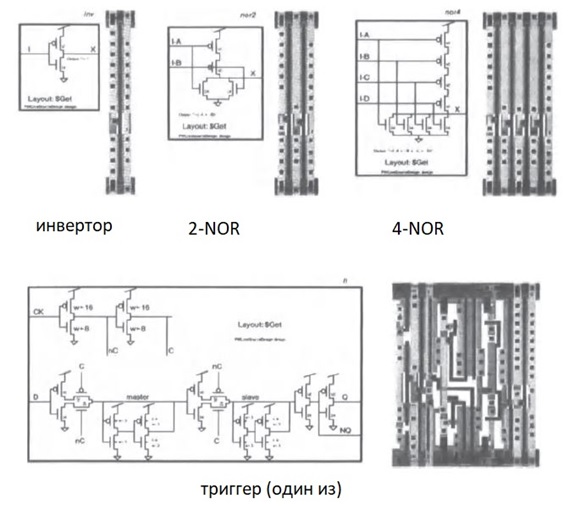

Как видно, сами стандартные элементы могут быть представлены графами (в которых в качестве элементов выступают транзисторы, элементы сопротивления и т.п., а ребрами являются соединения между упомянутыми элементами). Если перейти на чуть более высокий уровень абстракции, можно работать с графом, вершинами которого являются сами элементарные схемы, а ребрами - соединения между ними на части чипа или целом чипе.

Ниже представлены схема из трех рядов стандартных элементов, а после целый чип.

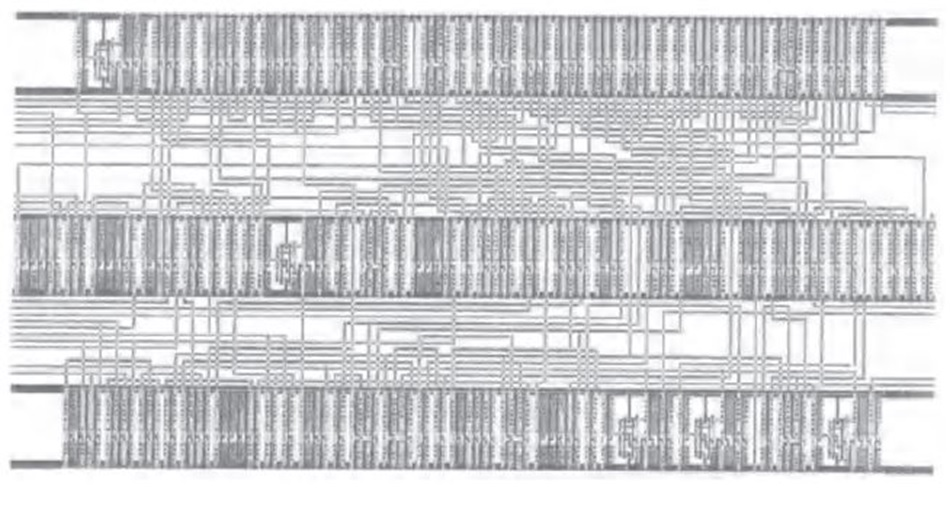

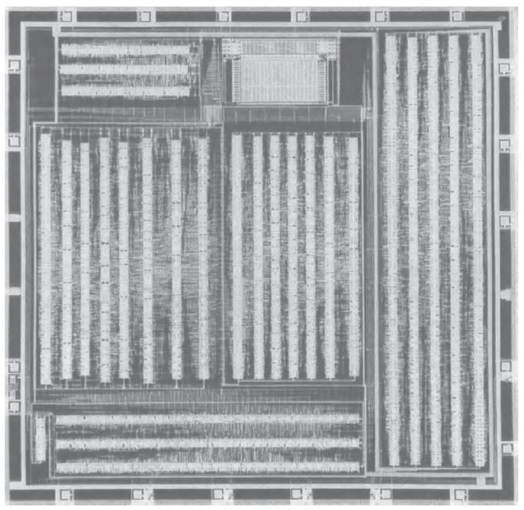

Сразу бросается в глаза основная проблема, с которой сталкиваются все специалисты по преоктированию БИС - количество элементов в схеме становится слишком велико при создании достаточно мощных устройств, а значит растет сложность проектирования устройства, нахождение его оптимальной укладки на пластине, оптимизиция соединений между элементами схемы для минимизации задержки. К тому же, даже после проектирования схемы, необходимо тщательно промоделировать работу устройства, поскольку цена ошибки (которые, к сожалению, случаются часто) высока при серийном выпуске устройства. Для решения всех обозначенных проблем активно используются графовые алгоритмы и потребность во все более продвинутых методах неизменно растет.

Принимая во внимание неизбежность обобщения, с которой мы сталкиваемся во время изучения большой темы в сжатые сроки, можно выделить несколько основных этапов синтеза БИС:

* Технологическое проектирование
* Логический синтез
* Маршрутизация (routing)
* Укладка схемы (placement)
* Синтез специализированных схем

В рамках курса будуит затронуты некоторые из упомянутых этапов с точки зрения теории графов. Ниже перечислены основные разделы курса:

* Минимальные остовные деревья нагруженных графов Минимальные прямоугольные деревья Штейнера
* Планарные графы. Распознавание планарности. Характеристики непланарных графов
* Связность и реализуемость графов
* Раскраска вершин и ребер
* Алгоритмы оптимизации на графах. Например, поиск минимальных сечений. Эвристические алгоритмы укладки и др.



## О практических задачах в рамках данного курса

Самостоятельная имплементация многих структур данных и алгоритмов данного курса **на языке python** будет предложена слушателям в качестве упражнений. Если Вы еще не знакомы с данным языком программирования, или хотели бы освежить свои знания, можно обратиться к большому числу доступных бесплатных учебных материалов, например [к данному короткому вводному курсу](https://github.com/in28minutes/python-tutorial-for-beginners).

Тем не менее, во многих случаях для проверки корректности, а также для реальных приложений, слушателям предлагается использовать библиотеку [NetworkX](https://networkx.org/documentation/stable/index.html). На сайте проекта все желающие могут ознакомиться с [обучающими материалами](https://networkx.org/documentation/stable/tutorial.html) и документацией.

Ниже будут продемонстрированы некоторые возможности данной библиотеки.
[Установка](https://networkx.org/documentation/stable/install.html) библиотеки выполняется при помощи стандартного менеджера пакетов python.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

#NetworkX поддерживает множество видов графов, в курсе Вам могут потребоваться:
#1) ненаправленные графы
#2) направленные графы
#3) мультиграфы
#Также в библиотеке реализовано большое число графовых алгоритмов,
#и имеется поддержка сложных аттрибутов для "нагрузки" графов.
#Мы будем раскрывать новые структуры данных по мере их необходимости.
#Для ознакомления давайте просто посмотрим как задать обычный граф и его ребра:

G = nx.Graph() #мы создаем объект класса граф
#граф по определению состоит из вершин и ребер, их можно добавлять несколькими
#различными способами:
G.add_node(1) #Добавим вручную вершину "1"
G.add_nodes_from([2, 3, 4]) #добавим сразу список из нескольких вершин - 2,3 и 4

#вершина не обязательно должна быть представлена номером,
#идентификатором вершины может быть любая базовая структура данных python
#(и вообще любая структура для которой корректно определено хэширование)
G.add_nodes_from(['вершина',(100,200,300)])
#обратите внимание что здесь идентификатором в первом случае служит строка
#а во втором - кортеж с тремя элементами
#так можно задавать вершины, но это может быть не всегда удобно - все зависит
#от конкретного приложения, которое Вы создаете

#и мы можем просмотреть список добавленных вершин:
print('Вершины графа:',list(G.nodes))

#аналогично мы можем работать с ребрами графа:
G.add_edge(1, 2) #добавляем ребро между вершинами 1 и 2
G.add_edges_from([(1, 2), (1, 3)]) #добавляем сразу несколько ребер из списка
G.add_edges_from([('вершина', 2), (1, (100,200,300))]) #и к "особым" вершинам

#теперь мы можем просмотреть список добавленных ребер:
print('Ребра графа:',list(G.edges))

print('Число вершин:',G.number_of_nodes(),'Число ребер:', G.number_of_edges())

Вершины графа: [1, 2, 3, 4, 'вершина', (100, 200, 300)]
Ребра графа: [(1, 2), (1, 3), (1, (100, 200, 300)), (2, 'вершина')]
Число вершин: 6 Число ребер: 4


In [ ]:
#удаление вершин и ребер происходит аналогичным образом при помощи
#Graph.remove_node(), Graph.remove_nodes_from(), Graph.remove_edge()
#и Graph.remove_edges_from()

G.remove_nodes_from(('вершина', 3)) #удалим несколько вершин
print('Вершины после удаления нескольких:', list(G.nodes))
G.remove_edge(1, (100,200,300)) #удалим одно ребро
print('Ребра после удаления нескольких:', list(G.edges))
print('Число вершин:',G.number_of_nodes(),'Число ребер:', G.number_of_edges())

#обратите внимание, что часть ребер исчезли после удаления вершин сами по себе

Вершины после удаления нескольких: [1, 2, 4, (100, 200, 300)]
Ребра после удаления нескольких: [(1, 2)]
Число вершин: 4 Число ребер: 1


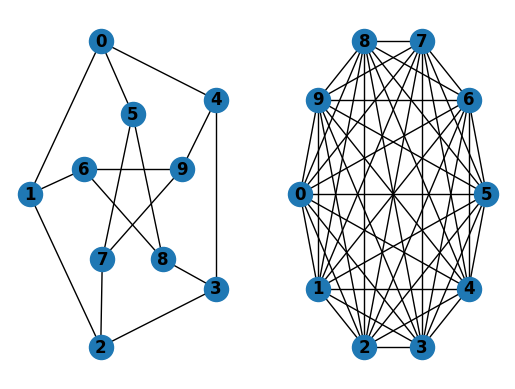

In [ ]:
#NetworkX содержит реализацию некоторых известных простых графов которые можно
#подгружать напрямую без инициализации вручную. Для их визуализации можно также
#использовать инструменты библиотеки. Например, ниже представлены
#граф Петерсена (слева) и полный граф на 10 вершин (справа)
#(полным графом на n вершин называем граф у которого каждая вершина соединена
#с каждой, кроме себя самой)
H = nx.complete_graph(10)
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw_shell(G,nlist=[range(5,10),[1,2,3,4,0]] , with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(H, with_labels=True, font_weight='bold')

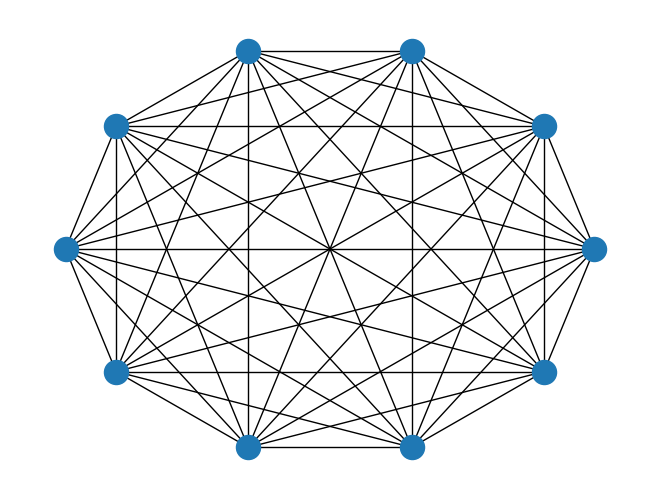

In [ ]:
#В качестве примера давайте вручную создадим полный граф на 10 вершин (K10),
#визуализируем его средствами NetworkX, а после проверим, совпадает ли он
#с библиотечным представлением графа K10 (в курсе Вы узнаете что равенство
#графов требует детализированного определения и основывается на изоморфизме)
G = nx.Graph()
for i in range(10):
  G.add_node(i)
for i in range(10):
  for j in range(i+1,10):
    G.add_edge(i,j)
nx.draw_shell(G)

In [ ]:
print('Изоморфен ли "наш" K10 библиотечному:', nx.is_isomorphic(G,nx.complete_graph(10)))

Изоморфен ли "наш" K10 библиотечному: True


Мы не будем подробно разбирать возможности библиотеки в данном разделе и сразу перейдем к задачам для самостоятельной работы. Исчерпывающие "введение" в библиотеку NetworkX можно найти на вышеупомянутой странице с обучающими материалами по [этой ссылке](https://networkx.org/documentation/stable/tutorial.html).

## Упражнения

В каждом упражнении Вам необходимо самостоятельно реализовать некоторую функцию с использованием структур данных из библиотеки networkx (графы, направленные графы). Вы можете пользоваться структурами данных, но не конструкторами и не алгоритмами библиотеки в данном наборе упражнений.

Для того, чтобы сдать проделанный набор упражнений, необходимо связаться с преподавателем во время семинарских занятий и направить свой код или ссылку на гитхаб со своим кодом по представленным ниже задачам. Преподаватель вправе добавлять дополнительные тесты для проверки работоспособности и корректности Вашего кода.

In [ ]:
#Упражнение 1
#Реализуйте функцию, не принимающую аргументов,
#и возвращающую граф на вершинах октаэдра (https://ru.wikipedia.org/wiki/Октаэдр)
#БЕЗ использования генератора
#библиотеки NetworkX (т.е. без использования nx.octahedral_graph)
#Построенный Вами граф должен быть изоморфен библиотечному

def my_octahedral_graph():
  G = nx.Graph()
  #####################################
  #TODO: Здесь должен быть Ваш код#####
  #####################################
  return G

G = my_octahedral_graph()
#Ваш граф должен быть изоморфен библиотечному (должно вернуться True):
print('Построенный граф изоморфен библиотечному:', nx.is_isomorphic(G,nx.octahedral_graph()))
nx.draw(G)

In [ ]:
#Упражнение 2
#Реализуйте функцию, не принимающую аргументов,
#и возвращающую граф на вершинах икосаэдра (https://ru.wikipedia.org/wiki/Икосаэдр)
#БЕЗ использования генератора
#библиотеки NetworkX (т.е. без использования nx.icosahedral_graph)
#Построенный Вами граф должен быть изоморфен библиотечному

def my_icosahedral_graph():
  G = nx.Graph()
  #####################################
  #TODO: Здесь должен быть Ваш код#####
  #####################################
  return G

G = my_icosahedral_graph()
#Ваш граф должен быть изоморфен библиотечному (должно вернуться True):
print('Построенный граф изоморфен библиотечному:', nx.is_isomorphic(G,nx.icosahedral_graph()))
nx.draw(G)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
#Упражнение 3
#Реализуйте функцию, принимающую в качестве аргумента натуральное число n > 2,
#и возвращающую полный граф на n вершин БЕЗ использования стандартного
#генератора библиотеки NetworkX (т.е. без использования nx.complete_graph)
#Построенный Вами граф должен быть изоморфен библиотечному

def my_complete_graph(n=3):
  G = nx.Graph()
  #####################################
  #TODO: Здесь должен быть Ваш код#####
  #####################################
  return G

n = 5 #TODO: для теста можете выбирать различные значения n
G = my_complete_graph(n)
#Ваш граф должен быть изоморфен библиотечному (должно вернуться True):
print('Построенный граф изоморфен библиотечному:', nx.is_isomorphic(G,nx.complete_graph(n)))
nx.draw(G)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
#Упражнение 4 (*)
#Пункт 1:
#Реализуйте функцию, не принимающую аргументов,
#и возвращающую граф на вершинах додэкаэдра (https://ru.wikipedia.org/wiki/Правильный_додекаэдр)
#БЕЗ использования генератора
#библиотеки NetworkX (т.е. без использования nx.dodecahedral_graph)
#Построенный Вами граф должен быть изоморфен библиотечному
#Пункт 2:
#По определению ДЕРЕВОМ мы называем связный граф без циклов
#Определите, какое минимальное число ребер надо удалить из графа додэкаэдра
#чтобы получилось дерево. Реализуйте это удаление и визуализируйте дерево

def my_dodecahedral_graph(): #Здесь мы строим граф по додэкаэдру
  G = nx.Graph()
  #####################################
  #TODO: Здесь должен быть Ваш код#####
  #####################################
  return G

def make_tree_from_dodecahedral(G): #Здесь мы урезаем граф до дерева
  result_tree = []
  #####################################
  #TODO: Здесь должен быть Ваш код#####
  #####################################
  return result_tree

G = my_dodecahedral_graph()
#Ваш граф должен быть изоморфен библиотечному (должно вернуться True):
print('Построенный граф изоморфен библиотечному:', nx.is_isomorphic(G,nx.dodecahedral_graph()))
nx.draw(G)

#сделаем дерево из додэкаэдра
G2 = make_tree_from_dodecahedral(G)
print('Является ли построенный граф деревом:', nx.is_tree(G2))
nx.draw(G2)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
#Упражнение 5 (**)
#NetworkX позволяет работать с направленными графами (Directed Graphs)
#а также приписывать вершинам и ребрам построенного графа аттрибуты.
#Если в качестве аттрибутов вершин направленного графа взять символы логических функций
#(конъюнкция, дизъюнкция и отрицание - в данном упражнении) и построить схему,
#у которой в каждую вершину с конъюнкцией и дизъюнкцией входит по два ребра, а
#в вершину с отрицанием - одно ребро, мы получим схему из функциональных элементов (СФЭ)
#которой удобно представлять логическую формулу.
#На данной странице проекта Вы можете нати описание, как такие схемы преобразовать
#в формулы (строки символов) : https://networkx.org/documentation/stable/auto_examples/algorithms/plot_circuits.html
#ВАША ЗАДАЧА:
#Напишите функцию, которая выполняет обратную задачу - корректную строку с
#ДНФ (не любая формула - это важно) (https://ru.wikipedia.org/wiki/Дизъюнктивная_нормальная_форма)
#(для упрощения - переменные могут именоваться только маленькими латинскими буквами)
#преобразует в направленный граф и визуализирует его

def string_to_formula(input_string):
  formula_representation = [] #Здесь должно быть Ваше представление для формулы
  #из принятой строки (Вы можете воспользоваться любыми библиотечными функциями для парсинга строки с формулами)
  #####################################
  #TODO: Здесь должен быть Ваш код#####
  #####################################
  return formula_representation

def formula_to_circuit(formula_representation):
  circuit = nx.DiGraph() #по формуле нужно создать направленный граф
  #####################################
  #TODO: Здесь должен быть Ваш код#####
  #####################################
  return circuit


#& - для логического "и", | - для логического "или", "¬" - для логического "не"
DNF_formula_example = '(x & y)|(y & ¬z)|(¬z & x & w)'
G = formula_to_circuit(string_to_formula(DNF_formula_example))
nx.draw_networkx(G)